In [2]:
import glob
import tensorflow as tf
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings(action='once')

In [3]:
def get_section_results(file, tag='Eval_AverageReturn', print_tags=False):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if print_tags:
                print(v.tag)
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == tag:
                Y.append(v.simple_value)
    return X, Y

In [10]:
rootdir = "./data"
experiments = os.listdir(rootdir)
experiments.sort()
experiments.remove(".DS_Store")
experiments
experiments_q1, experiments_q2, experiments_q3, experiments_q4 = [], [], [], []
for experiment in experiments:
    if experiment[5] == '1':
        experiments_q1.append(experiment)
    elif experiment[5] == '2':
        experiments_q2.append(experiment)
    elif experiment[5] == '3':
        experiments_q3.append(experiment)
    elif experiment[5] == '4':
        experiments_q4.append(experiment)

In [11]:
experiments_q1, experiments_q2, experiments_q3, experiments_q4

(['hw4_q1_cheetah_n500_arch1x32_cheetah-cs285-v0_24-10-2020_10-39-41',
  'hw4_q1_cheetah_n500_arch2x250_cheetah-cs285-v0_24-10-2020_10-52-44',
  'hw4_q1_cheetah_n5_arch2x250_cheetah-cs285-v0_24-10-2020_10-52-05'],
 ['hw4_q2_obstacles_singleiteration_obstacles-cs285-v0_24-10-2020_16-27-12'],
 ['hw4_q3_cheetah_cheetah-cs285-v0_24-10-2020_23-13-20',
  'hw4_q3_obstacles_obstacles-cs285-v0_24-10-2020_16-34-30',
  'hw4_q3_reacher_reacher-cs285-v0_24-10-2020_20-47-03'],
 ['hw4_q4_reacher_ensemble1_reacher-cs285-v0_25-10-2020_11-14-04',
  'hw4_q4_reacher_ensemble3_reacher-cs285-v0_25-10-2020_11-15-46',
  'hw4_q4_reacher_ensemble5_reacher-cs285-v0_25-10-2020_11-16-09',
  'hw4_q4_reacher_horizon15_reacher-cs285-v0_25-10-2020_09-31-02',
  'hw4_q4_reacher_horizon30_reacher-cs285-v0_25-10-2020_10-50-26',
  'hw4_q4_reacher_horizon5_reacher-cs285-v0_25-10-2020_08-49-12',
  'hw4_q4_reacher_numseq1000_reacher-cs285-v0_25-10-2020_11-13-27',
  'hw4_q4_reacher_numseq100_reacher-cs285-v0_25-10-2020_11-12-4

## Problem 2

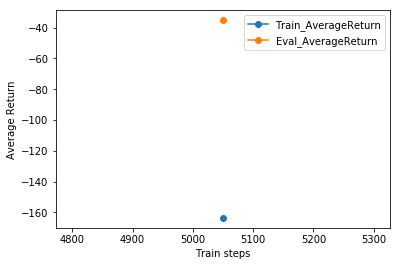

In [16]:
for experiment in experiments_q2:
    logdir = os.path.join(rootdir, experiment, "events*")
    eventfile = glob.glob(logdir)[0]
    X1, Y1 = get_section_results(eventfile, tag='Train_AverageReturn')
    X2, Y2 = get_section_results(eventfile, tag='Eval_AverageReturn')
    plt.plot(X1, Y1, '-o', label='Train_AverageReturn')
    plt.plot(X2, Y2, '-o', label='Eval_AverageReturn')
plt.xlabel("Train steps")
plt.ylabel("Average Return")
plt.title("")
plt.legend()
plt.show()

## Problem 3

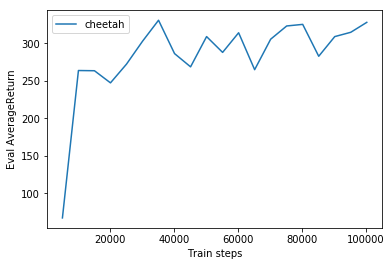

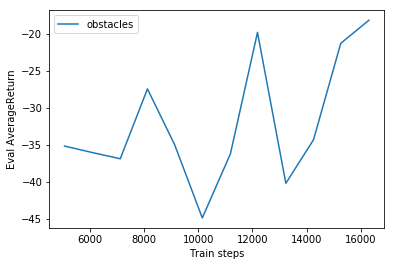

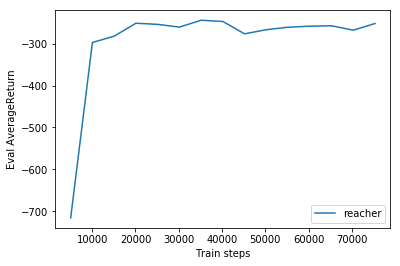

In [24]:
for experiment in experiments_q3:
    logdir = os.path.join(rootdir, experiment, "events*")
    if experiment[7] == 'o':
        label = 'obstacles'
    elif experiment[7] == 'r':
        label = 'reacher'
    elif experiment[7] == 'c':
        label = 'cheetah'
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, tag='Eval_AverageReturn', print_tags=False)
    plt.plot(X, Y, label=label)
    plt.xlabel("Train steps")
    plt.ylabel("Eval AverageReturn")
    plt.title("")
    plt.legend()
    plt.show()

## Problem 4

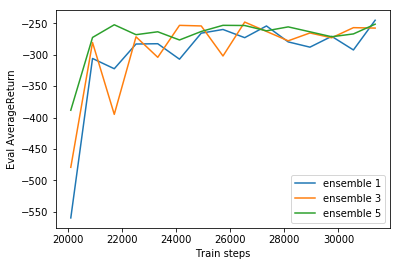

In [29]:
for experiment in experiments_q4:
    logdir = os.path.join(rootdir, experiment, "events*")
    eventfile = glob.glob(logdir)[0]
    
    if experiment[15] == 'e':
        label = 'ensemble '
        if experiment[23] == '1':
            label += '1'
        elif experiment[23] == '3':
            label += '3'
        elif experiment[23] == '5':
            label += '5'
    
        X, Y = get_section_results(eventfile, tag='Eval_AverageReturn', print_tags=False)
        plt.plot(X, Y, label=label)
plt.xlabel("Train steps")
plt.ylabel("Eval AverageReturn")
plt.title("")
plt.legend()
plt.show()

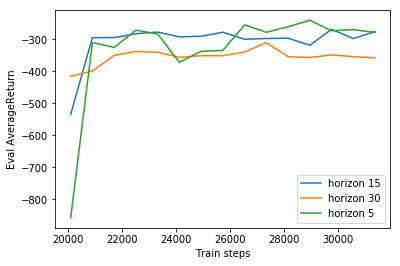

In [27]:
for experiment in experiments_q4:
    logdir = os.path.join(rootdir, experiment, "events*")
    eventfile = glob.glob(logdir)[0]
    
    if experiment[15] == 'h':
        label = 'horizon '
        if experiment[22] == '5':
            label += '5'
        elif experiment[22] == '1':
            label += '15'
        elif experiment[22] == '3':
            label += '30'
    
        X, Y = get_section_results(eventfile, tag='Eval_AverageReturn', print_tags=False)
        plt.plot(X, Y, label=label)
plt.xlabel("Train steps")
plt.ylabel("Eval AverageReturn")
plt.title("")
plt.legend()
plt.show()

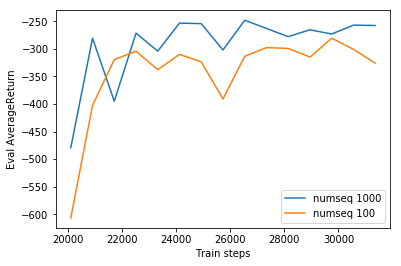

In [28]:
for experiment in experiments_q4:
    logdir = os.path.join(rootdir, experiment, "events*")
    eventfile = glob.glob(logdir)[0]
    
    if experiment[15] == 'n':
        label = 'numseq '
        if experiment[24] == '_':
            label += '100'
        elif experiment[24] == '0':
            label += '1000'
    
        X, Y = get_section_results(eventfile, tag='Eval_AverageReturn', print_tags=False)
        plt.plot(X, Y, label=label)
plt.xlabel("Train steps")
plt.ylabel("Eval AverageReturn")
plt.title("")
plt.legend()
plt.show()